### Data Mining and Machine Learning
### XGboost Classifier
#### Edgar Acuna
#### Abril  2021

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

### I. XGBoosting para Diabetes

In [2]:
#Leyendo el conjunto de datos pima-diabetes 
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names,header=None)
print(data.shape)

(768, 9)


In [3]:
y=data['class']
X=data.iloc[:,0:8]
y1=y.to_numpy()
X1=X.to_numpy()

[07:12:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


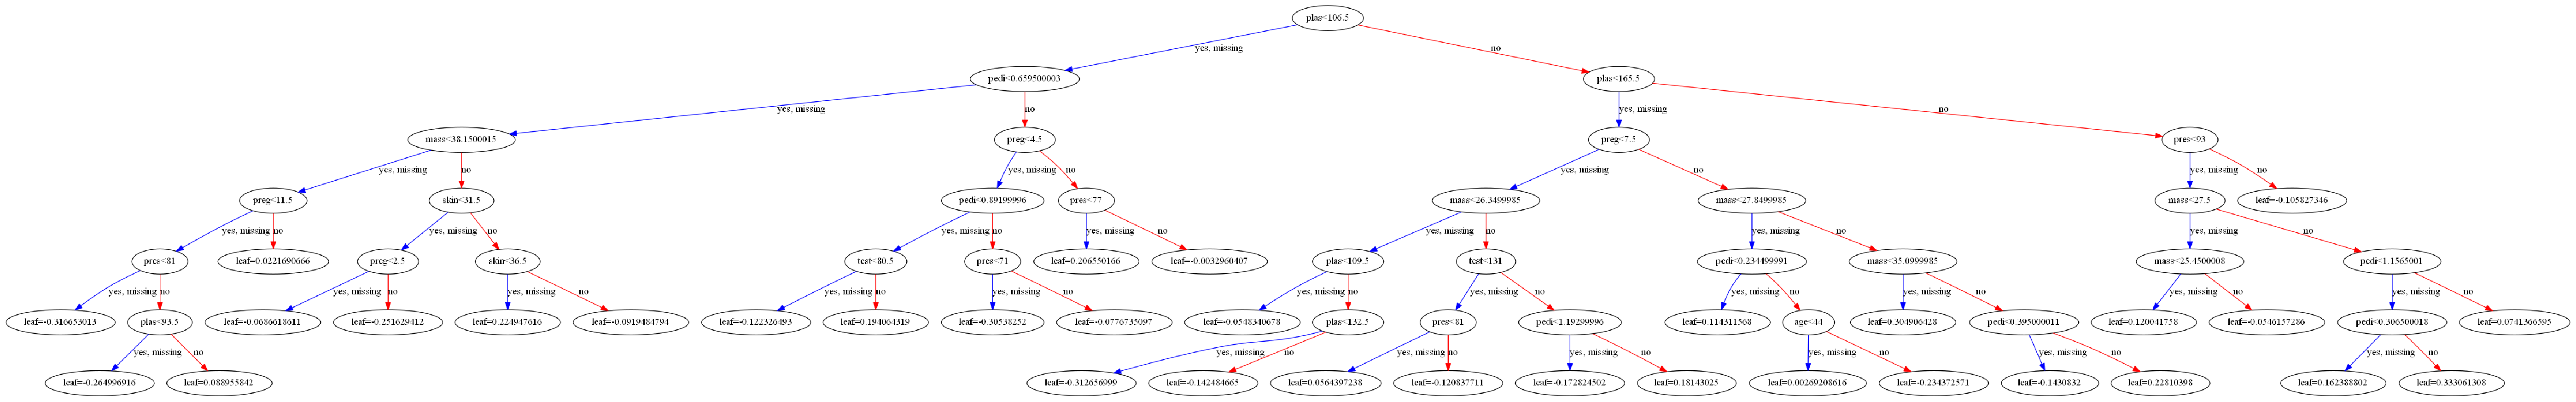

In [4]:
import xgboost as xgb
from xgboost import plot_tree
from matplotlib.pylab import rcParams
##set up the parameters
rcParams['figure.figsize'] = 100,80
#import os
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
model=xgb.XGBClassifier()
model.fit(X,y)
plot_tree(model,num_trees=4)

In [5]:

mod = xgb.XGBClassifier(
    gamma=1,                 
    learning_rate=0.01,
    max_depth=4,
    n_estimators=100,                                                                    
    subsample=0.8,
    random_state=34
) 

mod.fit(X, y)
predictions = mod.predict(X)
predictions

[07:12:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1,
       2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2,

In [6]:
#Estiamting the erro by resubstitution
pd.crosstab(predictions,y1)

col_0,1,2
row_0,,
1,452,81
2,48,187


In [7]:
#estimating the accuracy by 10 fold cross-validation
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_squared_error
kf = KFold(n_splits=10, shuffle=True, random_state=10)
precision=0
for train_index, test_index in kf.split(X1):
    xgb_model = xgb.XGBClassifier().fit(X1[train_index], y1[train_index])
    predictions = xgb_model.predict(X1[test_index])
    actuals = y1[test_index]
    #print(mean_squared_error(actuals, predictions))
    precision=precision+(actuals==predictions).sum()
print('The accuracy is=',precision*100/768)

[07:12:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:12:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:12:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:12:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

### II. XGBoosting para Landsat

In [8]:
url='http://academic.uprm.edu/eacuna/landsat.txt'
data = pd.read_csv(url, header=None,delim_whitespace=True)
y=data.iloc[:,36]-1
names=['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13',
            'C14','C15','C16','C17','C18','C19','C20','C21','C22','C23','C24','C25','C26','C27',
           'C28','C29', 'C30','C31','C32','C33','C34','C35','C36','C37']
X=data.iloc[:,0:36]

In [9]:
model = xgb.XGBClassifier(
    gamma=1,                 
    learning_rate=0.01,
    max_depth=3,
    n_estimators=100,                                                                    
    subsample=0.8,
    random_state=34
) 

model.fit(X, y)
predictions = model.predict(X)

[07:12:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [10]:
#estimating the accuracy by 10 fold cross-validation
y1=y.to_numpy()
X1=X.to_numpy()
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_squared_error
kf = KFold(n_splits=10, shuffle=True, random_state=10)
precision=0
for train_index, test_index in kf.split(X1):
    xgb_model = xgb.XGBClassifier().fit(X1[train_index], y1[train_index])
    predictions = xgb_model.predict(X1[test_index])
    actuals = y1[test_index]
    #print(mean_squared_error(actuals, predictions))
    precision=precision+(actuals==predictions).sum()
print('The accuracy is=',precision*100/len(X1))

[07:12:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:12:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:12:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:12:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

### III. XGBoosting para NMIST dataset

In [14]:
train=pd.read_csv("c://datamining/mnist_train.csv",header=None)
test=pd.read_csv("c://datamining/mnist_test.csv",header=None)
trainX=train.loc[:,1:785]
testX=test.loc[:,1:785]
trainY=train.loc[:,0]
testY=test.loc[:,0]

In [15]:
model = xgb.XGBClassifier(
    gamma=1,                 
    learning_rate=0.01,
    max_depth=3,
    n_estimators=50,                                                                    
    subsample=0.5,
    random_state=34
) 

model.fit(trainX, trainY)
predictions = model.predict(testX)

[07:16:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [16]:
#Estimating the error by resubstitution
(predictions==testY).sum()/10000

0.8247